In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

filename = ('/content/drive/MyDrive/Colab Notebooks/coding dojo/PTMachineLearning/kc_house_data.csv')
df = pd.read_csv(filename, delimiter=',')
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
#usamos id como caaracteristica referencia de index
df.index = df['id']
df.drop(columns = ['date', 'id'], inplace=True)
df.head(84)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531000030,720000.0,4,2.50,3450,39683,2.0,0,0,3,10,3450,0,2002,0,98010,47.3420,-122.025,3350,39750
5104520400,390000.0,3,2.50,2350,5100,2.0,0,0,3,8,2350,0,2003,0,98038,47.3512,-122.008,2350,5363
7437100340,360000.0,4,2.50,1900,5889,2.0,0,0,3,7,1900,0,1992,0,98038,47.3490,-122.031,1870,6405


In [15]:
#Solucion Bagged trees
X = df.drop(columns = 'price')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)
bt = BaggingRegressor()

In [16]:
bt.fit(X_train, y_train)

BaggingRegressor()

In [17]:
# Entrenamiento 
bt.score(X_train, y_train)


0.974199480873589

In [18]:
#y Prueba
bt.score(X_test, y_test)

0.8732495003157476

In [20]:
# Metodo random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
rf.score(X_train,y_train)

0.981876572035291

In [22]:
rf.score(X_test, y_test)

0.8840332291474102

<BarContainer object of 18 artists>

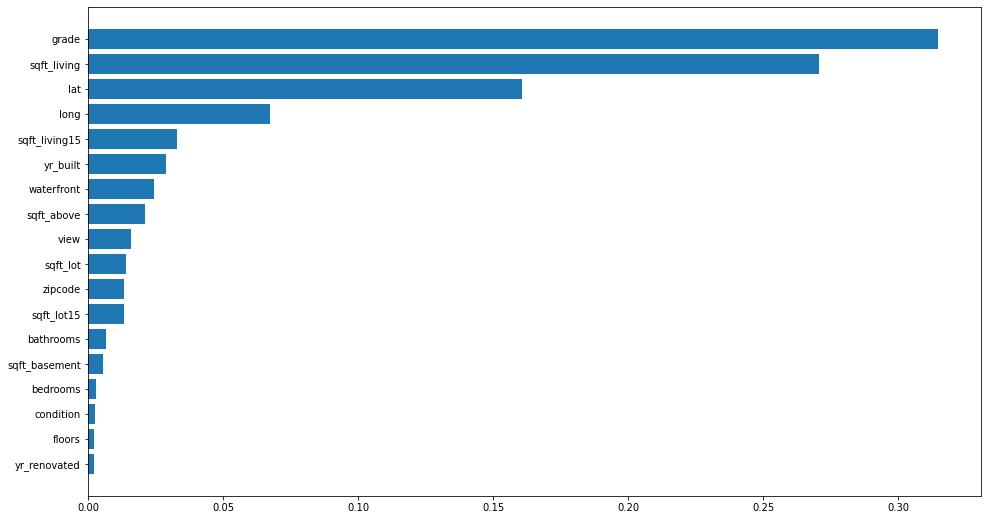

In [29]:
rf_addons = pd.DataFrame({'addons': X_train.columns, 'addons_importancia': rf.feature_importances_})
rf_addons.sort_values(by = 'addons_importancia', inplace=True)
plt.figure(figsize=(16,9))
plt.barh(rf_addons['addons'], rf_addons['addons_importancia'])

# respuesta 1
Las características más importantes son grade y sqft_living, lo cual se traduce a las características que hacen referencia a la valoración y el metro cuadrado habitable de cada vivienda.

# respuesta 2
Las características que también se deben tener en cuenta y ajustar pueden ser aquellas que secundan a las 2 primeras, es decir, latitud y longitud (leídas como 1 sola variable), y yr_built, es decir, el año de construcción de la propiedad. Éstas variables proporcionan el 80% de correlación dentro del rango máximo de 0,3
